# Implementation of LEX-Rank algorithm for Text Summarisation

In [1276]:
import nltk
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import pprint
import string
import re
import copy

stop_words = set(stopwords.words('english'))

## Text - News Article

Link: https://scroll.in/article/902847/linguistic-politics-poll-promise-of-english-medium-education-in-telangana-marks-a-significant-shift

In [1277]:
text = 'It is an irony that has taken all of 66 years to evolve. On October 19, 1952, the Gandhian Potti Sriramulu went on a hunger strike to demand a separate state for Telugu speakers. His fast was a reminder to the ruling Congress to fulfil its decades-old promise of establishing, as far as possible, homogeneous linguistic states in post-Independence India. Sriramulu died 58 days later, triggering an uproar that eventually led to the carving out of Andhra Pradesh from Madras in 1956. In 2018, the Bahujan Left Front, an emerging political formation in Telangana, which was carved out of Andhra Pradesh as a separate state in 2014, has promised in its election manifesto to introduce “English-medium instruction in schools along with Telugu” from lower kindergarten to Class 12. Telangana will vote on December 7 to choose its new Assembly, the results will be out on December 11. The wheel of linguistic politics has possibly come full circle. Indeed, the Bahujan Left Front’s manifesto is a reflection of the gradual change in priorities of the Telugu people from the time of Sriramulu. From the late 1990s, the rise of the Information Technology industry and the economic mobility it offered led to the atavistic Telugu pride of the 1950s segueing into a demand for English medium schools even before Telangana was born. Recognising this changing reality, in 2008, Andhra Pradesh Chief Minister YS Rajasekhara Reddy identified 6,500 government schools for SUCCESS – short for the government’s Strengthening and Universalisation of Quality and Access to Secondary Schools programme. These schools offered both Telugu and English as the medium of instruction to students from Class 6, when classes were split into two sections. Yet the children found the going extremely tough. Their vocabulary was insufficiently developed to switch over to English in Class 6 and, worse, English books were not made available. “There were also protests from teachers because they had been trained to teach in Telugu alone,” said N Narayana, convenor, Centre for Educational Research and Analysis, who provided inputs for the Bahujan Left Front’s manifesto. “They were neither willing nor suited for teaching in English.” As Success schools stumbled, the rush towards private English-medium schools continued unabated. For instance, the enrolment in government schools of Yellareddypet Mandal, in Rajanna Siricilla district, which is in now in Telangana, dwindled so alarmingly between 2008 and 2010 that Manku Rajaiah, the mandal educational officer, organised village meetings to fathom the craze among parents for English-medium schools. “It was very clear that parents wanted English as the medium of instruction from the primary level itself,” Rajaiah said. It was consequently decided to introduce English as the medium of instruction in those primary schools of Yellareddypet where the local community was willing to provide support. As many as 33 primary schools here adopted English as the medium of instruction. The rise in enrollment was instantaneous even though the certificate issued to students said they had been instructed in Telugu. This was because the primary schools did not have the autonomy to adopt English as the medium of instruction until 2014. “Our initiative’s impact was such that three out of the five success schools in our Mandal are now solely English medium,” said Rajaiah. “The other two have both Telugu and English as mediums of instruction.” Yellareddypet’s initiative was an exception. Therefore it did not come as a surprise that in 2015, a year after Telangana became a separate state, The Hindu reported the closure of many Success schools in Karimnagar and Nalgonda districts. This meant that they reverted to being exclusively Telugu medium schools. Today, an estimated 1,800 Success schools are functioning in Telangana, which has nearly 30,000 government schools. Given Telangana’s evident passion for English, it is understandable why the Bahujan Left Front has reversed the dominant norm in India’s electoral politics – of parties competing with each other to accord primacy to the regional languages. “It is sheer hypocrisy,” said G Ramulu, the coordinator of the Bahujan Left Front, who played a key role in writing its manifesto. “Those in the political class who speak of promoting Telugu send their own children to English-medium schools.” As Ramulu sees it, there is a rising quest among the lower castes and classes to send their children to English-medium schools. “Even the daily wage labourer wants English education for his children,” said Ramulu. “The only way the children of lower classes and castes can hope to compete with those of the ruling class is by studying in English.” English has become the rallying flag of the Bahujan Left Front because of the nature of its support base. A conglomeration of 28 minor political parties that is spearheaded by the Communist Party of India (Marxist), the Bahujan Left Front is the political arm, so to speak, of the Telangana Mass and Social Organisations, popularly known as T-Mass, which has the scholar Kancha Ilaiah as its chairman. Formed in July 2017, T-Mass has brought together 280 social organisations consisting of Ambedkarites or followers of Dr BR Ambedkar, Phuleites or votaries of Jyotirao Phule, and Marxists or those whose inspiration is Karl Marx. Anchored in the interests of Dalits, Other Backward Classes and religious minorities, T-Mass seeks to unite the Ambedkarites and communists, who have been engaged for decades in bruising debates whether caste or class is the principal faultline in India’s politics. “Our idea is to create the Ambedkarite-communist development model as the new alternative for the country,” said Ilaiah. “It is because of the dominant Nehruvian Brahminical ideology that India is the only democratic country where there are parallel systems of education having two different mediums of instruction.” There is the private sector, where the medium of instruction is overwhelmingly English. Regional languages are confined to the public sector. The dual system has enabled the middle class-upper castes to monopolise English, appropriate jobs commanding power, wealth and status, and establish their political dominance. Radical change cannot take place until the lower castes break this group’s monopoly over English, say Bahujan Left Front leaders. Ilaiah said that even the wealthy agrarian Shudra community did not send their children to English-medium schools because these were not located near their homes. Nor did anyone try to inculcate in them the consciousness of studying in English. “In ancient India, Brahmins debarred others from studying Sanskrit,” said Ilaiah. “In the modern era, through the system of parallel mediums of instruction, they are saying the lower castes cannot learn English.” Even though the Bahujan Left Front’s manifesto too provides for both English and Telugu mediums of instruction, its blueprint is a departure from the current system. It offers English as the medium of instruction from lower kindergarten, not from Class 6, and also promises it in every government school, not just where the dual system operates. “It is certainly better both for teachers and students to have English as the medium of instruction from lower kindergarten than to switch to it in Class 6,” said Narayana.'

### Preprocessing

In [1279]:
text_orig = copy.deepcopy(text)
text_lst_init =  re.split('; |\!|\?|\.',text_orig)

temp_in = []
for i in text_lst_init:
    if len(i) > 5:
        temp_in.append(i)

text_lst_init = temp_in


text = re.sub("\d+?\d*(?=\s|,|s|.)\s?", "", text)

In [1280]:
printable = set(string.printable)
text = filter(lambda x: x in printable, text)
text = text.replace(',','')
text = text.replace('  ',' ')

In [1281]:
text_lst = re.split('; |\!|\?|\.',text)

In [1282]:
temp = []
for i in text_lst:
    if len(i) > 5:
        temp.append(i)

text_lst = temp

for i in (text_lst):
    print i,'\n'

It is an irony that has taken all of years to evolve 

 On October  the Gandhian Potti Sriramulu went on a hunger strike to demand a separate state for Telugu speakers 

 His fast was a reminder to the ruling Congress to fulfil its decades-old promise of establishing as far as possible homogeneous linguistic states in post-Independence India 

 Sriramulu died days later triggering an uproar that eventually led to the carving out of Andhra Pradesh from Madras in  

 In the Bahujan Left Front an emerging political formation in Telangana which was carved out of Andhra Pradesh as a separate state in has promised in its election manifesto to introduce English-medium instruction in schools along with Telugu from lower kindergarten to Class  

 Telangana will vote on December to choose its new Assembly the results will be out on December  

 The wheel of linguistic politics has possibly come full circle 

 Indeed the Bahujan Left Fronts manifesto is a reflection of the gradual change in prior

### Count via term document matrix

In [1283]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words = stop_words)
count_vectorizer.fit_transform(text_lst)

count_vectorizer.get_feature_names()

[u'access', u'accord', u'adopt', u'adopted', u'agrarian', u'alarmingly', u'alone', u'along', u'also', u'alternative', u'ambedkar', u'ambedkarite', u'ambedkarites', u'among', u'analysis', u'anchored', u'ancient', u'andhra', u'anyone', u'appropriate', u'arm', u'assembly', u'atavistic', u'autonomy', u'available', u'backward', u'bahujan', u'base', u'became', u'become', u'better', u'blueprint', u'books', u'born', u'br', u'brahminical', u'brahmins', u'break', u'brought', u'bruising', u'cannot', u'carved', u'carving', u'caste', u'castes', u'centre', u'certainly', u'certificate', u'chairman', u'change', u'changing', u'chief', u'children', u'choose', u'circle', u'class', u'classes', u'clear', u'closure', u'come', u'commanding', u'communist', u'communists', u'community', u'compete', u'competing', u'confined', u'conglomeration', u'congress', u'consciousness', u'consequently', u'consisting', u'continued', u'convenor', u'coordinator', u'country', u'craze', u'create', u'current', u'daily', u'dalits'

In [1284]:
freq_term_matrix = count_vectorizer.transform(text_lst)

### Converting term document matrix to TFIDF matrix

In [1335]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

Use "tf_idf_matrix.todense()" function to get sentence vectors 

In [1286]:
tf_idf_matrix = tfidf.transform(freq_term_matrix)

### Making a Graph 

Through sentence vectors

In [1287]:
G = nx.Graph()

In [1288]:
nodes = [i for i in range(len(text_lst))]

In [1289]:
G.add_nodes_from(nodes)

Edge Weights are "Cosine Similarity" values

In [1290]:
adj_matrix = []
for i in range((len(text_lst))):
    adj_matrix.append([])

In [1291]:
from sklearn.metrics.pairwise import cosine_similarity

for i in nodes:
    for j in nodes:
        sim = cosine_similarity(tf_idf_matrix.todense()[i], tf_idf_matrix.todense()[j])
        adj_matrix[i].append(float(sim))

In [1292]:
for i in nodes:
    for j in nodes:
        if i != j:
            G.add_edge(i,j,weight = adj_matrix[i][j])

In [1293]:
pos=nx.spring_layout(G)

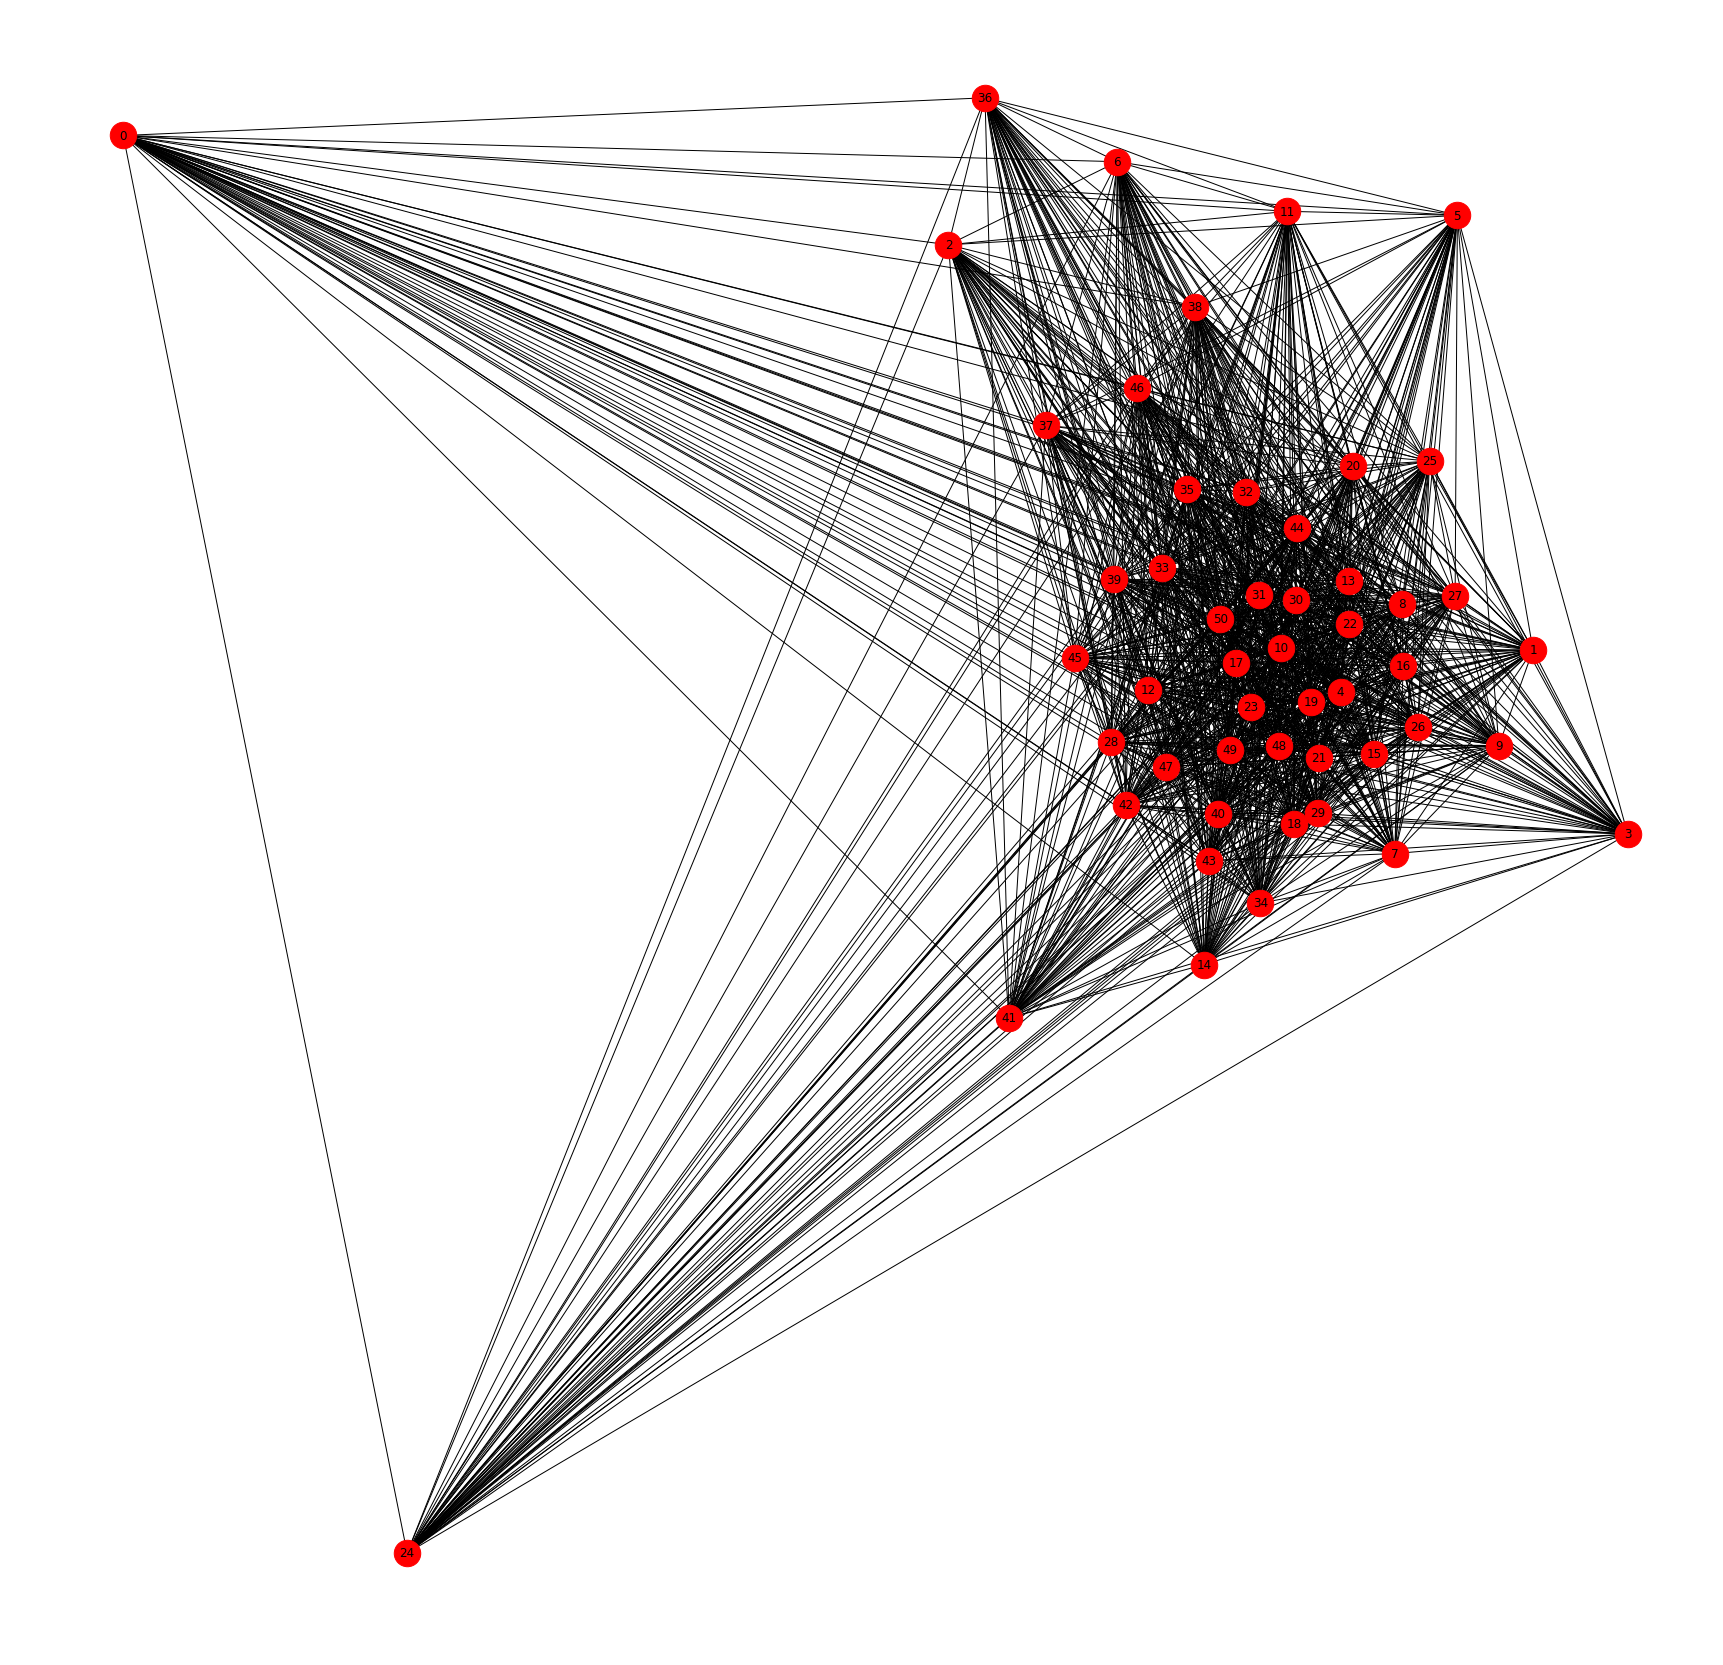

In [1294]:
from matplotlib import pyplot as plt

plt.figure(figsize=(30,30))

nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)

plt.axis('off')
plt.draw()

### Using pagerank 

To get the maximum probability of landing on a during a random walk

In [1314]:
pr=nx.pagerank(G)

### Sorted order of relevancy

In [1315]:
import operator
pr_sorted = sorted(pr.items(), key=operator.itemgetter(1))

for i in range(len(pr_sorted)):
    ids = pr_sorted[-(i+1)]
    print text_lst[ids[0]],'--------',"\x1b[31m%f\x1b[0m"%(ids[1]),"\n"

 In the Bahujan Left Front an emerging political formation in Telangana which was carved out of Andhra Pradesh as a separate state in has promised in its election manifesto to introduce English-medium instruction in schools along with Telugu from lower kindergarten to Class  -------- 0.042145 

 Those in the political class who speak of promoting Telugu send their own children to English-medium schools -------- 0.039031 

 These schools offered both Telugu and English as the medium of instruction to students from Class when classes were split into two sections -------- 0.038643 

 As many as primary schools here adopted English as the medium of instruction -------- 0.035462 

 The other two have both Telugu and English as mediums of instruction -------- 0.033834 

 This was because the primary schools did not have the autonomy to adopt English as the medium of instruction until  -------- 0.033490 

 It is certainly better both for teachers and students to have English as the medium of 

In [1316]:
for i,w in enumerate(pr_sorted):
    pr_sorted[i] = list(w)

In [1317]:
pr_sorted

[[0, 0.0030425963488843826], [24, 0.0030425963488843826], [36, 0.005626010903000536], [5, 0.006391068680600872], [11, 0.0065624984342544275], [3, 0.0069150798797181605], [41, 0.006992494236687387], [6, 0.007118865651448256], [2, 0.00752097577771877], [14, 0.010560692940890787], [1, 0.010993578917225584], [38, 0.011177144579890023], [45, 0.011331963549440544], [37, 0.011774751895312699], [46, 0.013404879918667784], [9, 0.013830879505666626], [42, 0.014216081010363724], [12, 0.015524251260900051], [25, 0.015542011808476402], [20, 0.015603711612702378], [39, 0.015969198355076965], [34, 0.01729337677782867], [29, 0.017299063806687942], [7, 0.01752226052884017], [13, 0.017831250516177424], [28, 0.01838559191815627], [43, 0.019459066286263], [32, 0.02029496926021063], [27, 0.02031835271762335], [35, 0.020807632814383775], [16, 0.02081308757602231], [26, 0.02177394891814705], [47, 0.02259641403664833], [8, 0.02313635497934319], [22, 0.02532259987082115], [15, 0.0254967868844152], [49, 0.02599

### Maximal Marginal Relevance (MMR)

In [1318]:
def mmr(pr_sorted_):
    most_sim = pr_sorted_[-1]
    pr_sorted_ = pr_sorted_[:-1]
    
    most_sim_node = most_sim[0]
    
    left_node = []
    for i in pr_sorted_:
        left_node.append(i[0])
    
    for i,j in enumerate(left_node):
        sim = cosine_similarity(tf_idf_matrix.todense()[j], tf_idf_matrix.todense()[most_sim_node])
        lambd = 0.04
        rel_weight = lambd*float(sim)
        pr_sorted_[i][1] = pr_sorted_[i][1] - rel_weight
    
    return pr_sorted_, most_sim_node

### Second most relevant sentence after MMR

In [1319]:
pr_new, most_sim_node = mmr(pr_sorted)

summary = [most_sim_node]

for i,w in enumerate(pr_new):
    pr_new[i] = tuple(w)

pr_sorted_new = sorted(pr_new, key=lambda tup: tup[1])

In [1320]:
pr_sorted_new

[(3, 0.002578413642484999), (0, 0.0030425963488843826), (24, 0.0030425963488843826), (5, 0.004864042840807589), (1, 0.005447721006766142), (36, 0.005626010903000536), (11, 0.0065624984342544275), (41, 0.006992494236687387), (6, 0.007118865651448256), (2, 0.00752097577771877), (9, 0.009554284209924782), (14, 0.009849548569405049), (25, 0.009851918668511647), (45, 0.010688907107663497), (37, 0.010908692746757764), (38, 0.011177144579890023), (42, 0.011216273469323574), (29, 0.01137225115157886), (34, 0.011930719824630544), (7, 0.012123672131329633), (12, 0.01323174308175449), (46, 0.013404879918667784), (13, 0.013588218766491151), (43, 0.013966553756617591), (20, 0.01443306984931394), (35, 0.014543891647422792), (28, 0.014909440419223754), (39, 0.01508037574766023), (27, 0.01654227181512266), (26, 0.017498103171421184), (16, 0.01803524926153312), (49, 0.01887774284151953), (8, 0.019442332233065573), (47, 0.019446446436462865), (32, 0.0197628027230079), (18, 0.020697418914683425), (33, 0.

Top - 5

In [1336]:
for i in range(len(pr_sorted_new)):
    if i < 5:
        ids = pr_sorted_new[-(i+1)]
        print text_lst_init[ids[0]],'--------',"\x1b[31m%f\x1b[0m"%(ids[1]),"\n"

 As many as 33 primary schools here adopted English as the medium of instruction -------- 0.018241 

” Even though the Bahujan Left Front’s manifesto too provides for both English and Telugu mediums of instruction, its blueprint is a departure from the current system -------- 0.017213 

 This was because the primary schools did not have the autonomy to adopt English as the medium of instruction until 2014 -------- 0.016718 

 “It was very clear that parents wanted English as the medium of instruction from the primary level itself,” Rajaiah said -------- 0.016547 

 “In the modern era, through the system of parallel mediums of instruction, they are saying the lower castes cannot learn English -------- 0.016481 



### Third most relevant sentence after MMR

In [1322]:
for i,w in enumerate(pr_sorted_new):
    pr_sorted_new[i] = list(w)
    
pr_new, most_sim_node = mmr(pr_sorted_new)
summary.append(most_sim_node)

for i,w in enumerate(pr_new):
    pr_new[i] = tuple(w)

pr_sorted_new = sorted(pr_new, key=lambda tup: tup[1])

Top - 5

In [1337]:
for i in range(len(pr_sorted_new)):
    if i < 5:
        ids = pr_sorted_new[-(i+1)]
        print text_lst_init[ids[0]],'--------',"\x1b[31m%f\x1b[0m"%(ids[1]),"\n"

 As many as 33 primary schools here adopted English as the medium of instruction -------- 0.018241 

” Even though the Bahujan Left Front’s manifesto too provides for both English and Telugu mediums of instruction, its blueprint is a departure from the current system -------- 0.017213 

 This was because the primary schools did not have the autonomy to adopt English as the medium of instruction until 2014 -------- 0.016718 

 “It was very clear that parents wanted English as the medium of instruction from the primary level itself,” Rajaiah said -------- 0.016547 

 “In the modern era, through the system of parallel mediums of instruction, they are saying the lower castes cannot learn English -------- 0.016481 



### Fourth most relevant sentence after MMR


In [1324]:
for i,w in enumerate(pr_sorted_new):
    pr_sorted_new[i] = list(w)
    
pr_new, most_sim_node = mmr(pr_sorted_new)
summary.append(most_sim_node)

for i,w in enumerate(pr_new):
    pr_new[i] = tuple(w)

pr_sorted_new = sorted(pr_new, key=lambda tup: tup[1])

Top - 5 

In [1339]:
for i in range(len(pr_sorted_new)):
    if i < 5:
        ids = pr_sorted_new[-(i+1)]
        print text_lst_init[ids[0]],'--------',"\x1b[31m%f\x1b[0m"%(ids[1]),"\n"
        

 As many as 33 primary schools here adopted English as the medium of instruction -------- 0.018241 

” Even though the Bahujan Left Front’s manifesto too provides for both English and Telugu mediums of instruction, its blueprint is a departure from the current system -------- 0.017213 

 This was because the primary schools did not have the autonomy to adopt English as the medium of instruction until 2014 -------- 0.016718 

 “It was very clear that parents wanted English as the medium of instruction from the primary level itself,” Rajaiah said -------- 0.016547 

 “In the modern era, through the system of parallel mediums of instruction, they are saying the lower castes cannot learn English -------- 0.016481 



In [1340]:
summary.append(pr_sorted_new[-1][0])
print summary

[4, 10, 19, 44, 19]


### Sentence order according to the article

In [1327]:
summary.sort()
print summary 
final_sum = []

for i in summary:
    final_sum.append(text_lst_init[i])

[4, 10, 19, 44]


### Summary

In [1328]:
print '.'.join(final_sum)

 In 2018, the Bahujan Left Front, an emerging political formation in Telangana, which was carved out of Andhra Pradesh as a separate state in 2014, has promised in its election manifesto to introduce “English-medium instruction in schools along with Telugu” from lower kindergarten to Class 12. These schools offered both Telugu and English as the medium of instruction to students from Class 6, when classes were split into two sections. As many as 33 primary schools here adopted English as the medium of instruction. Ilaiah said that even the wealthy agrarian Shudra community did not send their children to English-medium schools because these were not located near their homes


# Community Clustering 

In [1329]:
from networkx.algorithms import community

G_c = nx.Graph()

G_c.add_nodes_from(nodes)

for i in nodes:
    for j in nodes:
        if i != j:
            if adj_matrix[i][j] > 0.17:
                G_c.add_edge(i,j,weight = adj_matrix[i][j])

communities_generator = community.girvan_newman(G_c)
next_level_communities = next(communities_generator)
comms = sorted(map(sorted, next_level_communities))

### Clusters

In [1330]:
comms

[[0], [1], [2], [3], [4, 7, 8, 10, 12, 13, 20, 23, 26, 30, 31, 32, 33, 35, 39, 43, 44, 47, 48, 49, 50], [5], [6], [9, 15, 16, 17, 18, 19, 21, 22, 27, 28, 40, 41], [11], [14], [24], [25], [29], [34], [36], [37], [38], [42], [45], [46]]

### Picking 1 from each communities (above 2 members)

In [1331]:
comm_sent = []
for i in comms:
    if len(i) > 2:
        new_G = nx.Graph()
        for j in i:
            new_G.add_node(j)
        
        for j in i:
            for k in i:
                new_G.add_edge(k,j,weight = adj_matrix[j][k])
                
        pr = nx.pagerank(new_G)
        pr_sorted = sorted(pr.items(), key=operator.itemgetter(1))
        
        print text_lst_init[pr_sorted[-1][0]], '--------',"\x1b[31m%f\x1b[0m"%(pr_sorted[-1][1]),"\n"
        
        comm_sent.append(text_lst_init[pr_sorted[-1][0]])

 These schools offered both Telugu and English as the medium of instruction to students from Class 6, when classes were split into two sections -------- 0.061861 

 As many as 33 primary schools here adopted English as the medium of instruction -------- 0.100454 



### Summary

In [1332]:
print '.'.join(comm_sent)

 These schools offered both Telugu and English as the medium of instruction to students from Class 6, when classes were split into two sections. As many as 33 primary schools here adopted English as the medium of instruction


# Community Clustering through Bipartite Seperation

### Picking top 2 from each communities

In [1333]:
from networkx.algorithms.community import kernighan_lin_bisection

comm_sent = []
for i in kernighan_lin_bisection(G):
    i = list(i)
    
    new_G = nx.Graph()
    for j in i:
        new_G.add_node(j)

    for j in i:
        for k in i:
            new_G.add_edge(k,j,weight = adj_matrix[j][k])

    pr = nx.pagerank(new_G)
    pr_sorted = sorted(pr.items(), key=operator.itemgetter(1))

    print text_lst_init[pr_sorted[-1][0]], '--------',"\x1b[31m%f\x1b[0m"%(pr_sorted[-1][1]),"\n"
    print text_lst_init[pr_sorted[-2][0]],  '--------',"\x1b[31m%f\x1b[0m"%(pr_sorted[-2][1]),"\n"
    
    comm_sent.append(text_lst_init[pr_sorted[-1][0]])
    comm_sent.append(text_lst_init[pr_sorted[-2][0]])

” Even though the Bahujan Left Front’s manifesto too provides for both English and Telugu mediums of instruction, its blueprint is a departure from the current system -------- 0.050734 

 Given Telangana’s evident passion for English, it is understandable why the Bahujan Left Front has reversed the dominant norm in India’s electoral politics – of parties competing with each other to accord primacy to the regional languages -------- 0.047887 

 As many as 33 primary schools here adopted English as the medium of instruction -------- 0.051981 

 These schools offered both Telugu and English as the medium of instruction to students from Class 6, when classes were split into two sections -------- 0.050820 



### Summary

In [1334]:
print '.'.join(comm_sent)

” Even though the Bahujan Left Front’s manifesto too provides for both English and Telugu mediums of instruction, its blueprint is a departure from the current system. Given Telangana’s evident passion for English, it is understandable why the Bahujan Left Front has reversed the dominant norm in India’s electoral politics – of parties competing with each other to accord primacy to the regional languages. As many as 33 primary schools here adopted English as the medium of instruction. These schools offered both Telugu and English as the medium of instruction to students from Class 6, when classes were split into two sections


### Import as Library
Checking the code for other texts

In [ ]:
import summary_pa as summary_

## Test 1:

#### Genre: Biography 

Link: https://en.wikipedia.org/wiki/Narendra_Modi

In [1229]:
text = "Narendra Damodardas Modi pronounced born 17 September 1950) is an Indian politician serving as the 14th and current Prime Minister of India since 2014. He was the Chief Minister of Gujarat from 2001 to 2014, and is the Member of Parliament for Varanasi. Modi is a member of the Bharatiya Janata Party (BJP) and the Rashtriya Swayamsevak Sangh (RSS). Born to a Gujarati family in Vadnagar, Modi helped his father sell tea as a child and later ran his own stall. He was introduced to the RSS at the age of eight, beginning a long association with the organisation. He left home after graduating from school, partly because of an arranged marriage which he rejected. Modi travelled around India for two years and visited a number of religious centres. He returned to Gujarat and moved to Ahmedabad in 1969 or 1970. In 1971 he became a full-time worker for the RSS. During the state of emergency imposed across the country in 1975, Modi was forced to go into hiding. The RSS assigned him to the BJP in 1985, and he held several positions within the party hierarchy until 2001, rising to the rank of General Secretary. Modi was appointed Chief Minister of Gujarat in 2001, due to Keshubhai Patel's failing health and poor public image following the earthquake in Bhuj. Modi was elected to the legislative assembly soon after. His administration has been considered complicit in the 2002 Gujarat riots,[a] or otherwise criticised for its handling of it, however a Supreme Court-appointed Special Investigation Team (SIT) found no evidence to initiate prosecution proceedings.[b] His policies as chief minister, credited with encouraging economic growth, have received praise.[9] His administration has been criticised for failing to significantly improve health, poverty, and education indices in the state. Modi led the BJP in the 2014 general election, which gave the party a majority in the Lok Sabha, the first time a single party had achieved this since 1984. Modi himself was elected to parliament from Varanasi. Since taking office, Modi's administration has tried to raise foreign direct investment in the Indian economy, increased spending on infrastructure, and reduced spending on healthcare and social welfare programmes. Modi has attempted to improve efficiency in the bureaucracy, and centralised power by abolishing the planning commission and replacing it with the NITI Aayog. He has begun a high-profile sanitation campaign, and weakened or abolished environmental and labour laws. Credited with engineering a political realignment towards right-wing politics, Modi remains a figure of controversy domestically and internationally over his Hindu nationalist beliefs and his role during the 2002 Gujarat riots, cited as evidence of an exclusionary social agenda. Narendra Modi was born on 17 September 1950 to a family of grocers in Vadnagar, Mehsana district, Bombay State (present-day Gujarat). He was the third of six children born to Damodardas Mulchand Modi (c.1915 – 1989) and Hiraben Modi (born c.1920).[18] Modi's family belonged to the Modh-Ghanchi-Teli (oil-presser) community, which is categorised as an Other Backward Class by the Indian government. As a child, Modi helped his father sell tea at the Vadnagar railway station and later ran a tea stall with his brother near a bus terminus.[24][25] Modi completed his higher secondary education in Vadnagar in 1967, where a teacher described him as an average student and a keen debater, with interest in theatre.[26] Modi had an early gift for rhetoric in debates, and his teachers and students noted this.[27] Modi preferred playing larger-than-life characters in theatrical productions, which has influenced his political image.[28][29] When eight years old, Modi discovered the Rashtriya Swayamsevak Sangh (RSS) and began attending its local shakhas (training sessions). There, Modi met Lakshmanrao Inamdar, popularly known as Vakil Saheb, who inducted him as a balswayamsevak (junior cadet) for RSS and became his political mentor.[30] While Modi was training with the RSS, he also met Vasant Gajendragadkar and Nathalal Jaghda, Bharatiya Jana Sangh leaders who were founding members of the BJP's Gujarat unit in 1980.[31] Engaged while still a child to Jashodaben, a girl from a family who lived close by, Modi rejected the arranged marriage at the same time he graduated from high school.[32] The resulting familial tensions contributed to his decision to leave home in 1967.[33] Modi spent the ensuing two years travelling across Northern and North-eastern India, though few details of where he went have emerged.[34] In interviews, Modi has described visiting Hindu ashrams founded by Swami Vivekananda: the Belur Math near Kolkata, followed by the Advaita Ashrama in Almora and the Ramakrishna Mission in Rajkot. Modi remained only a short time at each, since he lacked the required college education. Vivekananda has been described as a large influence in Modi's life.[38] In the early summer of 1968, Modi reached the Belur Math but was turned away, after which Modi wandered through Calcutta, West Bengal and Assam, stopping in Siliguri and Guwahati.[39] Modi then went to the Ramakrishna Ashram in Almora, where he was again rejected, before travelling back to Gujarat via Delhi and Rajasthan in 1968–69.[40] Sometime in late 1969 or early 1970, Modi returned to Vadnagar for a brief visit before leaving again for Ahmedabad.[41] There, Modi lived with his uncle, working in the latter's canteen at the Gujarat State Road Transport Corporation.[42][43] In Ahmedabad, Modi renewed his acquaintance with Inamdar, who was based at the Hedgewar Bhavan (RSS headquarters) in the city. After the Indo-Pakistani War of 1971, he stopped working for his uncle and became a full-time pracharak (campaigner) for the RSS,[43] working under Inamdar.[47] Shortly before the war, Modi took part in a non-violent protest against the Indian government in New Delhi, for which he was arrested; this has been cited as a reason for Inamdar electing to mentor him.[47] Many years later Modi would co-author a biography of Inamdar, published in 2001. In 1978 Modi received a Bachelor of Arts degree in political science from School of Open Learning[49] at University of Delhi,[50][51] graduating with a third class.[52] Five years later, in 1983, he received a Master of Arts degree in political science from Gujarat University, as an external distance learning student."

In [1225]:
summary, text_init, adj, G_new = summary_.summary(text, 5)

In [1226]:
print summary

Narendra Damodardas Modi pronounced born 17 September 1950) is an Indian politician serving as the 14th and current Prime Minister of India since 2014. Modi is a member of the Bharatiya Janata Party (BJP) and the Rashtriya Swayamsevak Sangh (RSS). Born to a Gujarati family in Vadnagar, Modi helped his father sell tea as a child and later ran his own stall. Modi himself was elected to parliament from Varanasi.[47] Many years later Modi would co-author a biography of Inamdar, published in 2001


In [1227]:
print summary_.bipartite_community(text_init, adj, G_new)

 He was the Chief Minister of Gujarat from 2001 to 2014, and is the Member of Parliament for Varanasi. Modi is a member of the Bharatiya Janata Party (BJP) and the Rashtriya Swayamsevak Sangh (RSS). Born to a Gujarati family in Vadnagar, Modi helped his father sell tea as a child and later ran his own stall.[42][43] In Ahmedabad, Modi renewed his acquaintance with Inamdar, who was based at the Hedgewar Bhavan (RSS headquarters) in the city


In [1228]:
print summary_.simple_community(text_init, adj, G_new)

 He was the Chief Minister of Gujarat from 2001 to 2014, and is the Member of Parliament for Varanasi. Modi is a member of the Bharatiya Janata Party (BJP) and the Rashtriya Swayamsevak Sangh (RSS). Born to a Gujarati family in Vadnagar, Modi helped his father sell tea as a child and later ran his own stall. He was the third of six children born to Damodardas Mulchand Modi (c.[42][43] In Ahmedabad, Modi renewed his acquaintance with Inamdar, who was based at the Hedgewar Bhavan (RSS headquarters) in the city.[47] Many years later Modi would co-author a biography of Inamdar, published in 2001


## Test 2:

#### Genre: History Essay 

Link: http://www.digitalhistory.uh.edu/teachers/modules/ww2/bibliographical_essay.html

In [1230]:
text = '''World War II caused greater destruction than any other war in history. The war took the lives of about 17 million soldiers and an even greater number of civilians, who died as a result of bombings, starvation, and deliberate campaigns of mass murder. The war also ushered in the atomic age and was quickly followed by the collapse of the wartime alliance between the United States and the Soviet Union and the beginning of the Cold War. World War I created the conditions that led to World War II. The peace settlement ending the war, which stripped the Central Powers of territory and arms and required them to pay reparations, left lasting bitterness in Germany, Austria, Bulgaria, Hungary, and Turkey. The peace treaty also disappointed two of the victors, Italy and Japan. In addition, the war severely disrupted Europe's economies and helped set the stage for the Great Depression of the 1930s. General histories of the war, which examine the war's origins, military history, and consequences, include John Keegan, The Second World War (1989); C.L. Sulzberger and Stephen E. Ambrose, American Heritage New History of World War II (1997); and Gerhard L. Weinberg, A World at Arms: A Global History of World War II (1994). Valuable reference works include I.C.B. Dear and M.R.D. Foot, eds., The Oxford Companion to the Second World War (1995); John Ellis, World War II: A Statistical Survey (1993); and John Keegan, ed., The Times Atlas to the Second World War (1989). To understand the war's outcome, see Richared Overy, Why the Allies Won (1995). The most thorough and balanced recent history of the American role in World War II is David M. Kennedy, Freedom from Fear: The American People in Depression and War, 1929-1945 (1999), which examines the causes of U.S. involvement in the conflict, wartime diplomacy, military strategy, and the war's economic and social implications. The question of how Japan was able to carry out its successful surprise attack on Pearl Harbor is thoroughly examined in Gordon W. Prange, At Dawn We Slept: The Untold Story of Pearl Harbor (1982). The war's European theater is discussed in Stephen L. McFarland and Wesley Phillips Newton, To Command the Sky: The Battle for Air Superiority Over German, 1942-1944 (1991); Nathan Miller, War at Sea: A Naval History of World War II (1995); and James Polmar and T.B. Allen, World War II (1996). Soldiers' wartime experiences are examined in Gerald F. Linderman, The World Within War: America's Combat Experience in World War II (1997). On the Pacific War, see John Dower, War Without Mercy: Race and Power in the Pacific War (1986), Akira Iriye, Power and Culture: The Japanese-American War, 1941-1945 (1981), and Ronald Spector, Eagle Against the Sun (1985) World War II transformed the American homefront. It jump-started the economy; ended Depression-era unemployment, relocated Americans in unprecedented numbers, and permanently altered the status of women, adolescents, and racial minorities in American life. The war's impact on the homefront is analyzed in William L. O'Neill, A Democracy at War: America's Fight at Home and Abroad in World War II (1993). Oral histories from the war years can be found in Studs Terkel, The Good War (1984). World War II had a dramatic impact on women's lives. The most visible change involved the appearance of large numbers of women in uniform, as more than 250,000 women joined the WACs, the Army Nurses Corps, the WAVES, and the Navy Nurses Corps. The war also challenged the conventional image of female behavior, as "Rosie the Riveter" became the popular symbol of women who worked in defense industries. Wartime transformations in women's lives are examined in Susan M. Hartmann, The Homefront and Beyond: Women in the 1940s (1982) and D'Ann Campbell, Women at War with America: Private Lives in a Patriotic Era (1984). World War II affected children and adolescents no less than women. In fact, the word "teenager" first appeared during the war. William M. Tuttle, Jr., Daddy's Gone to War: The Second World War in the Lives of America's Children (1993) traces the changes in young peoples' lives. During World War II, African Americans waged battles on two fronts. They helped the country win the war overseas and pressed for equal rights at home. This dual struggle for victory against fascism and discrimination, known as the "Double V" campaign, is examined in Neil Wynn, The Afro-American and the Second World War (1976). The internment of 112,000 mainland Japanese Americans, one of the most shameful chapters in American history, is examined in Peter Irons, Justice at War: The Story of the Japanese Internment Cases (1983). A 1942 government report on the Pearl Harbor attack, written by Supreme Court Justice Owen J. Roberts, which claimed without supporting evidence that the Japanese had received support from some Japanese Americans, helped to create a climate of opinion that led to internment. World War II marked the dawn of the atomic age. The development of nuclear weapons is thoroughly examined in Richard Rhodes, The Making of the Atomic Bomb (1986). The decision to drop two atomic bombs on Japan remains one of the most controversial decisions in military history. Martin Sherwin, A World Destroyed: The Atomic Bomb and the Grand Alliance (1975) analyzes the factors that went into this decision.'''

In [1231]:
summary, text_init, adj, G_new = summary_.summary(text, 5)

In [1232]:
print summary

 World War I created the conditions that led to World War II. General histories of the war, which examine the war's origins, military history, and consequences, include John Keegan, The Second World War (1989).and John Keegan, ed. Soldiers' wartime experiences are examined in Gerald F. World War II affected children and adolescents no less than women


In [1233]:
print summary_.bipartite_community(text_init, adj, G_new)

 World War I created the conditions that led to World War II. involvement in the conflict, wartime diplomacy, military strategy, and the war's economic and social implications. It jump-started the economy. World War II affected children and adolescents no less than women


In [1234]:
print summary_.simple_community(text_init, adj, G_new)

 Soldiers' wartime experiences are examined in Gerald F. In fact, the word "teenager" first appeared during the war


## Test 3:

#### Genre: Public Speech

Link: http://www.hitler.org/speeches/05-04-41.html

In [1250]:
text = '''At a time when only deeds count and words are of little importance, it is
  not my intention to appear before you, the elected representatives of the
  German people, more often than absolutely necessary. The first time I spoke
  to you was at the outbreak of the war when, thanks to the Anglo-French conspiracy
  against peace, every attempt at an understanding with Poland, which otherwise
  would have been possible, had been frustrated. The most unscrupulous men of the present time had, as they admit today, decided
  as early as 1936 to involve the Reich, which in its peaceful work of
  reconstruction was becoming too powerful for them, in a new and bloody war
  and, if possible, to destroy it. 
  
  They had finally succeeded in finding a State that was prepared for their interests and aims, and that State was
  Poland. All my endeavors to come to an understanding with Britain were wrecked by
  the determination of a small clique which, whether from motives of hate or
  for the sake of material gain, rejected every German proposal for an
  understanding due to their resolve, which they never concealed, to resort
  to war, whatever happened. The man behind this fanatical and diabolical plan to bring about war at whatever
  cost was Mr. Churchill. His associates were the men who now form the British
  Government. These endeavors received most powerful support, both openly and secretly,
  from the so-called great democracies on both sides of the Atlantic. At a
  time when the people were more and more dissatisfied with their deficient
  statesmanship, the responsible men over there believed that a successful
  war would be the most likely means of solving problems that otherwise would
  be beyond their power to solve.
  
  Behind these men there stood the great international Jewish financial interests
  that control the banks and the Stock Exchange as well as the armament industry.
  And now, just as before, they scented the opportunity of doing their unsavory
  business. And so, just as before, there was no scruple about sacrificing
  the blood of the peoples. That was the beginning of this war. A few weeks
  later the State that was the third country in Europe, Poland, but had been
  reckless enough to allow herself to be used for the financial interests of
  these warmongers, was annihilated and destroyed.
  
  In these circumstances I considered that I owed it to our German people and
  countless men and women in the opposite camps, who as individuals were as
  decent as they were innocent of blame, to make yet another appeal to the
  common sense and the conscience of these statesmen. On October 6, 1939, I
  therefore once more publicly stated that Germany had neither demanded nor
  intended to demand anything either from Britain or from France, that it was
  madness to continue the war and, above all, that the scourge of modern weapons
  of warfare, once they were brought into action, would inevitably ravage vast
  territories.
  
  But just as the appeal I made on September 1, 1939, proved to be in vain,
  this renewed appeal met with indignant rejection. The British and their Jewish
  capitalist backers could find no other explanation for this appeal, which
  I had made on humanitarian grounds, than the assumption of weakness on the part
  of Germany.
  
  They assured the people of Britain and France that Germany dreaded the clash
  to be expected in the spring of 1940 and was eager to make peace for fear
  of the annihilation that would then inevitably result.
  
  Already at that time the Norwegian Government, misled by the stubborn insistence
  of Mr. Churchill's false prophecies, began to toy with the idea of a British
  landing on their soil, thereby contributing to the destruction of Germany
  by permitting their harbors and Swedish iron ore fields to be seized.
  
  So sure were Mr. Churchill and Paul Reynaud of the success of their new scheme
  that finally, whether from sheer recklessness or perhaps under the influence
  of drink, they deemed it no longer necessary to make a secret of their
  intentions.
  
  It was thanks to these two gentlemen's tendency to gossip that the German
  Government at that time gained cognizance of the plans being made against
  the Reich. A few weeks later this danger to Germany was eliminated. One of
  the boldest deeds of arms in the whole history of warfare frustrated the
  attack of the British and French armies against the right flank of our line
  of defense.
  
  Immediately after the failure of these plans, increased pressure was exerted
  by the British warmongers upon Belgium and Holland. Now that the attack upon
  our sources for the supply of iron ore had proved unsuccessful, they aimed
  to advance the front to the Rhine by involving the Belgian and Dutch States
  and thus to threaten and paralyze our production centers for iron and steel.
  
  On May 10 of last year perhaps the most memorable struggle in all German
  history commenced. The enemy front was broken up in a few days and the stage
  was then set for the operation that culminated in the greatest battle of
  annihilation in the history of the world. Thus France collapsed, Belgium
  and Holland were already occupied, and the battered remnants of the British
  expeditionary force were driven from the European continent, leaving their
  arms behind.
  
  On July 19, 1940, I then convened the German Reichstag for the third time
  in order to render that great account which you all still remember. The meeting
  provided me with the opportunity of expressing the thanks of the nation to
  its soldiers in a form suited to the uniqueness of the event. Once again
  I seized the opportunity of urging the world to make peace. And what I foresaw
  and prophesied at that time happened. My offer of peace was misconstrued
  as a symptom of fear and cowardice.
  
  The European and American warmongers succeeded once again in befogging the
  sound common sense of the masses, who can never hope to profit from this
  war, by conjuring up false pictures of new hope. Thus, finally, under pressure
  of public opinion, as formed by their press, they once more managed to induce
  the nation to continue this struggle.
  
  Even my warnings against night bombings of the civilian population, as advocated
  by Mr. Churchill, were interpreted as a sign of German impotence. He, the
  most bloodthirsty or amateurish strategist that history has ever known, actually
  saw fit to believe that the reserve displayed for months by the German Air
  Force could be looked upon only as proof of their incapacity to fly by night.
  
  So this man for months ordered his paid scribblers to deceive the British
  people into believing that the Royal Air Force alone - and no others - was
  in a position to wage war in this way, and that thus ways and means had been
  found to force the Reich to its knees by the ruthless onslaught of the British
  Air Force on the German civilian population in conjunction with the starvation
  blockade.
  
  Again and again I uttered these warnings against this specific type of aerial
  warfare, and I did so for over three and a half months. That these warnings
  failed to impress Mr. Churchill does not surprise me in the least. For what
  does this man care for the lives of others? What does he care for culture
  or for architecture? When war broke out he stated clearly that he wanted
  to have his war, even though the cities of England might be reduced to ruins.
  So now he has got his war.
  
  My assurances that from a given moment every one of his bombs would be returned
  if necessary a hundredfold failed to induce this man to consider even for
  an instant the criminal nature of his action. He professes not to be in the
  least depressed and he even assures us that the British people, too, after
  such bombing raids, greeted him with a joyous serenity, causing him to return
  to London refreshed by his visits to the stricken areas.
  
  It is possible that this sight strengthened Mr. Churchill in his firm
  determination to continue the war in this way, and we are no less determined
  to continue to retaliate, if necessary, a hundred bombs for every one of
  his and to go on doing so until the British nation at last gets rid of this
  criminal and his methods.
  
  The appeal to forsake me, made to the German nation by this fool and his
  satellites on May Day, of all days, are only to be explained either as
  symptomatic of a paralytic disease or of a drunkard's ravings. His abnormal
  state of mind also gave birth to a decision to transform the Balkans into
  a theater of war.
  
  For over five years this man has been chasing around Europe like a madman
  in search of something that he could set on fire. Unfortunately, he again
  and again finds hirelings who open the gates of their country to this
  international incendiary.
  
  After he had succeeded in the course of the past winter in persuading the
  British people by a wave of false assertions and pretensions that the German
  Reich, exhausted by the campaign in the preceding months, was completely
  spent, he saw himself obliged, in order to prevent an awakening of the truth,
  to create a fresh conflagration in Europe.
  
  In so doing he returned to the project that had been in his mind as early
  as the autumn of 1939 and the spring of 1940. It was thought possible at
  the time to mobilize about 100 divisions in Britain's interest.
  
  The sudden collapse which we witnessed in May and June of the past year forced
  these plans to be abandoned for the moment. But by the autumn of last year
  Mr. Churchill began to tackle this problem once again.
  
  In the meantime, however, certain difficulties had arisen. As a result, Rumania,
  owing to internal changes, dropped out of England's political scheme.
  
  In dealing with these conditions, I shall begin by giving you a brief outline
  of the aims of Germany's policy in the Balkans. As in the past, the Reich
  never pursued any territorial or any other selfish political interest in
  the Balkans. In other words, the Reich has never taken the slightest interest
  in territorial problems and internal conditions in these States for any selfish
  reason whatsoever.
  
  On the other hand, the Reich has always endeavored to build up and to strengthen
  close economic ties with these States in particular. This, however, not only
  served the interests of the Reich but equally the interests of these countries
  themselves.
  
  If any two national economic systems ever effectively complemented one another,
  that is especially the case regarding the Balkan States and Germany. Germany
  is an industrial country and requires foodstuffs and raw materials. The Balkan
  States are agrarian countries and are short of these raw materials. At the
  same time, they require industrial products.
  
  It was therefore hardly surprising when Germany thus became the main business
  partner of the Balkan States. Nor was this in Germany's interest alone, but
  also in that of the Balkan peoples themselves.
  
  AND NONE BUT OUR JEW-RIDDEN DEMOCRACIES, WHICH CAN THINK ONLY IN TERMS OF
  CAPITALISM, CAN MAINTAIN THAT IF ONE STATE DELIVERS MACHINERY TO ANOTHER
  STATE IT THEREBY DOMINATES THAT OTHER STATE. IN ACTUAL FACT SUCH DOMINATION,
  IF IT OCCURS, CAN BE ONLY A RECIPROCAL DOMINATION.
  
  It is presumably easier to be without machinery than without food and raw
  materials. Consequently, the partner in need of raw material and foodstuffs
  would appear to be more tied down than the recipient of industrial products.
  IN THIS TRANSACTION THERE WAS NEITHER CONQUEROR NOR CONQUERED. THERE WERE
  ONLY PARTNERS.
  
  The German Reich of the National Socialist revolution has prided itself on
  being a fair and decent partner, offering in exchange high-quality products
  instead of worthless democratic paper money. For these reasons the Reich
  was interested in only one thing if, indeed, there was any question of political
  interest, namely, in seeing that internally the business partner was firmly
  established on a sound and healthy basis.
  
  THE APPLICATION OF THIS IDEA LED IN FACT NOT ONLY TO INCREASING PROSPERITY
  IN THESE COUNTRIES BUT ALSO TO THE BEGINNING OF MUTUAL CONFIDENCE. All the
  greater, however, became the endeavor of that world incendiary, Churchill,
  to put an end to this peaceful development and by shamelessly imposing upon
  these States utterly worthless British guarantees and promises of assistance
  to introduce into this peaceable European territory elements of unrest,
  uncertainty, distrust and, finally, conflict.
  
  Originally, Rumania was first won over by these guarantees and later, of
  course, Greece. It has, meanwhile, probably been sufficiently demonstrated
  that he had absolutely no power of any kind to provide real help and that
  these guarantees were merely intended to rope these States in to follow the
  dangerous trend of filthy British politics.
  
  RUMANIA HAS HAD TO PAY BITTERLY FOR THE GUARANTEES, WHICH WERE CALCULATED
  TO ESTRANGE HER FROM THE AXIS POWERS.
  
  Greece, which least of all required such a guarantee, was offered her share
  to link her destiny to that of the country that provided her King with cash
  and orders.
  
  EVEN TODAY I FEEL THAT I MUST, AS I BELIEVE IN THE INTEREST OF HISTORICAL
  ACCURACY, DISTINGUISH BETWEEN THE GREEK PEOPLE AND THAT THIN TOP LAYER OF
  CORRUPT LEADERS WHO, INSPIRED BY A KING WHO HAD NO EYES FOR THE DUTY OF TRUE
  LEADERSHIP, PREFERRED INSTEAD TO FURTHER THE AIMS OF BRITISH WAR POLITICS.
  To me this is a subject of profound regret.
  
  Germany, with the faint hope of still being able to contribute in some way
  to a solution of the problem, had not severed relations with Greece. But
  even then I was bound in duty to point out before the whole world that we
  would not tacitly allow a revival of the old Salonika scheme of the Great
  War.
  
  Unfortunately, my warning was not taken seriously enough. That we were
  determined, if the British tried to gain another foothold in Europe, to drive
  them back into the sea was not taken seriously enough.
  
  The result was that the British began in an increasing degree to establish
  bases for the formation of a new Salonika army. They began by laying out
  airdromes and by establishing the necessary ground organization in the firm
  conviction that the occupation of the airdromes themselves could afterward
  be carried out very speedily.
  
  Finally a continuous stream of transports brought equipment for an army which,
  according to Mr. Churchill's idea and plans, was to be landed in Greece.
  As I have said, already we were aware of this. For months we watched this
  entire strange procedure with attention, if with restraint.
  
  The reverses suffered by the Italian Army in North Africa, owing to a certain
  material inferiority of their tanks and anti-tank guns, finally led Mr. Churchill
  to believe that the time was ripe to transfer the theater of war from Libya
  to Greece. He ordered the transport of the remaining tanks and of the infantry
  division, composed mainly of Anzacs, and was convinced that he could now
  complete his scheme, which was to set the Balkans aflame.
  
  THUS DID MR. CHURCHILL COMMIT ONE OF THE GREATEST STRATEGIC BLUNDERS OF THIS
  WAR. As soon as there could be no further doubt regarding Britain's intentions
  of gaining a foothold in the Balkans, I took the necessary steps.
  
  Germany, by keeping pace with these moves, assembled the necessary forces
  for the purpose of counteracting any possible tricks of that gentleman. In
  this connection I must state categorically that this action was not directed
  against Greece.
  
  The Duce did not even request me to place one single German division at his
  disposal for this purpose. He was convinced that with the advent of good
  weather his stand against Greece would have been brought to a successful
  conclusion. I was of the same opinion.
  
  The concentration of German forces was therefore not made for the purpose
  of assisting the Italians against Greece. It was a precautionary measure
  against the British attempt under cover of the clamor caused by the Italo-Greek
  war to intrench themselves secretly in the Balkans in order to force the
  issue from that quarter on the model of the Salonika army during the World
  War, and, above all, to draw other elements into the whirlpool.
  
  This hope was founded principally on two States, namely, Turkey and Yugoslavia.
  But with these very States I have striven during the years since I came into
  power to establish close co-operation.
  
  The World War actually started from Belgrade. Nevertheless, the German people,
  who are by nature so ready to forgive and forget, felt no animosity toward
  that country. Turkey was our ally in the World War. The unfortunate outcome
  of that struggle weighed upon that country just as heavily as it did upon
  us.
  
  The great genius who created the new Turkey was the first to set a wonderful
  example of recovery to our allies whom fortune had at that time deserted
  and whom fate had dealt so terrible a blow. Whereas Turkey, thanks to the
  practical attitude of her leaders, preserved her independence in carrying
  out her own resolutions, Yugolsavia fell a victim to British intrigue.
  
  Most of you, especially my old Party comrades among you, know what efforts
  I have made to establish a straightforward understanding and indeed friendly
  relations between Germany and Yugoslavia. In pursuance of this aim Herr von
  Ribbentrop, our Minister of Foreign Affairs, submitted to the Yugoslav Government
  proposals that were so outstanding and so fair that at least even the Yugoslav
  State of that time seemed to become increasingly eager for such close
  co-operation.
  
  Germany had no intention of starting a war in the Balkans. On the contrary,
  it was our honest intention as far as possible to contribute to a settlement
  of the conflict with Greece by means that would be tolerable to the legitimate
  wishes of Italy.
  
  The Duce not only consented to but lent his full support to our efforts to
  bring Yugoslavia into a close community of interests with our peace aims.
  Thus it finally became possible to induce the Yugoslav Government to join
  the Threepower Pact, which made no demands whatever on Yugoslavia but only
  offered that country advantages.
  
  Thus on March 26 of this year a pact was signed in Vienna that offered the
  Yugoslav State the greatest future conceivable and could have assured peace
  for the Balkans. Believe me, gentlemen, on that day I left the beautiful
  city of the Danube truly happy not only because it seemed as though almost
  eight years of foreign policies had received their reward but also because
  I believed that perhaps at the last moment German intervention in the Balkans
  might not be necessary.
  
  We were all stunned by the news of that coup, carried through by a handful
  of bribed conspirators who had brought about the event that caused the British
  Prime Minister to declare in joyous words that at last he had something good
  to report.
  
  YOU WILL SURELY UNDERSTAND, GENTLEMEN, THAT WHEN I HEARD THIS I AT ONCE GAVE
  ORDERS TO ATTACK YUGOSLAVIA. To treat the, German Reich in this way is
  impossible. One cannot spent years in concluding a treaty that is in the
  interest of the other party merely to discover that this treaty has not only
  been broken overnight but also that it has been answered by the insulting
  of the representative of the German Reich, by the threatening of his military
  attache, by the injuring of the aide de camp of this attache, by the maltreating
  of numerous other Germans, by demolishing property, by laying waste the homes
  of German citizens and by terrorizing.
  
  GOD KNOWS THAT I WANTED PEACE. But I can do nothing but protect the interests
  of the Reich with those means which, thank God, are at our disposal. I made
  my decision at that moment all the more calmly because I knew that I was
  in accord with Bulgaria, who had always remained unshaken in her loyalty
  to the German Reich, and with the equally justified indignation of Hungary.
  
  Both of our old allies in the World War were bound to regard this action
  as a provocation emanating from the State that once before had set the whole
  of Europe on fire and had been guilty of the indescribable sufferings that
  befell Germany, Hungary, and Bulgaria in consequence.
  
  The general directions of operations issued by me through the Supreme Command
  of the German forces on March 27 confronted the Army and the Air Force with
  a formidable task. By a mere turn of the hand an additional campaign had
  to be prepared. Units that had already arrived had to be moved about. Supplies
  of armaments had to be assured and the air force had to take over numerous
  improvised airports part of which were still under water.
  
  WITHOUT THE SYMPATHETIC ASSISTANCE OF HUNGARY AND THE EXTREMELY LOYAL ATTITUDE
  OF RUMANIA IT WOULD HAVE BEEN VERY DIFFICULT TO CARRY OUT MY ORDERS IN THE
  SHORT TIME ENVISAGED.
  
  I fixed April 6 as the day on which the attack was to begin. The main plan
  of operation was: First, to proceed with an army coming from Bulgaria against
  Thrace in Greece in the direction of the Aegean Sea.
  
  The main striking strength of this army lay in its right wing, which was
  to force a passage through to Salonika by using mountain divisions and a
  division of tanks; second, to thrust forward with a second army with the
  object of establishing connection as speedily as possible with the Italian
  forces advancing from Albania. These two operations were to begin on April
  6.
  
  Third, a further operation, beginning on the eighth, provided for the
  break-through of an army from Bulgaria with the object of reaching the
  neighborhood of Belgrade. In conjunction with this, a German army corps was
  to occupy the Banat on the tenth.
  
  In connection with these operations general agreement had been made with
  our allies, Italy and Hungary. Agreements as to co-operation had also been
  reached between the two air forces. The command of the German Armies operating
  against Macedonia and Greece was placed in the hands of Field Marshal von
  List, who had already particularly distinguished himself in the previous
  campaigns. Once more and under the most exacting conditions he carried out
  the task confronting him in truly superior fashion.
  
  The forces advancing against Yugoslavia from the southwest and from Hungary
  were commanded by Col. Gen. von Weick. He, too, in a very short time with
  the forces under his command reached his objective.
  
  The Army and SS detachments operating under Field Marshal von Brauchitsch,
  as Commander in Chief, and the Chief of the General Staff, Col. Gen. Halder,
  forced the Greek Army in Thrace to capitulate after only five days, established
  contact with the Italian forces advancing from Albania, occupied Salonika,
  and thus generally prepared the way for the difficult and glorious break-through
  via Larissa to Athens.
  
  These operations were crowned by the occupation of the Peloponnesus and numerous
  Greek islands. A detailed appreciation of the achievements will be given
  by the German High Command.
  
  The Air Force under the personal command of Reich Marshal Goering was divided
  into two main groups, commanded by Col. Gen. Loehr and General von Richthofen.
  It was their task, first, to shatter the enemy air force and to smash its
  ground organization; second, to attack every important military objective
  in the conspirators' headquarters at Belgrade, thus eliminating it from the
  very outset; third, by every manner of active co-operation everywhere with
  the fighting German troops to break the enemy's resistance, to impede the
  enemy's flight, to prevent as far as possible his embarkation.
  
  The German armed forces have truly surpassed themselves in this campaign.
  There is only one way of characterizing that campaign:
  
  Nothing is impossible for the German soldier. Historical justice, however,
  obliges me to say that of the opponents that have taken up arms against us,
  MOST PARTICULARLY THE GREEK SOLDIERS, HAVE FOUGHT WITH THE GREATEST BRAVERY
  AND CONTEMPT OF DEATH. They only capitulated when further resistance became
  impossible and therefore useless.
  
  But I am now compelled to speak of the enemy who is the main cause of this
  conflict. As a German and as a soldier I consider it unworthy ever to revile
  a fallen enemy. But it seems to me to be necessary to defend the truth from
  the wild exaggerations of a man who as a soldier is a bad politician and
  as a politician is an equally bad soldier.
  
  Mr. Churchill, who started this struggle, is endeavoring, as with regard
  to Norway or Dunkerque, to say something that sooner or later might perhaps
  he twisted around to resemble success. I do not consider that honorable but
  in his case it is understandable.
  
  The gift Mr. Churchill possesses is the gift to lie with a pious expression
  on his face and to distort the truth until finally glorious victories are
  made out of the most terrible defeats.
  
  A British Army of 60,000 to 70,000 men landed in Greece. Before the catastrophe
  the same man maintained, moreover, that it consisted of 240,000 men. The
  object of this army was to attack Germany from the south, inflict a defeat
  upon her, and from this point as in 1918 turn the tide of the war.
  
  I prophesied more correctly than Mr. Churchill in my last speech, in which
  I announced that wherever the British might set foot on the Continent they
  would be attacked by us and driven into the sea.
  
  Now, with his brazen effrontery, he asserts that this war has cost us 75,000
  lives. He causes his presumably not overintelligent fellow-countrymen to
  be informed by one of his paid creatures that the British, after having slain
  enormous masses of Germans, finally turned away from sheer abhorrence of
  the slaughter and, strictly speaking, withdrew for this reason alone.
  
  I will now present to you the results of this campaign in a few short figures.
  In the course of the operations against Yugoslavia there were the following
  numbers of purely Serbian prisoners, leaving out soldiers of German origin
  and some other groups, 6,198 officers, 313,864 men.
  
  The number of Greek prisoners, 8,000 officers and 210,000 men, has not the
  same significance. The number of Englishmen, New Zealanders and Australians
  taken prisoner exceeds 9,000 officers and men.
  
  The German share of the booty alone, according to the estimates at present
  available, amounts to more than half a million rifles, far more than 1,000
  guns, many thousand machine-guns and anti-aircraft machine-guns, vehicles,
  and large amounts of ammunition . . . .
  
  The losses of the German Army and the German Air Force as well as those of
  the SS troops in this campaign are the smallest that we have ever suffered
  so far. The German armed forces have in fighting against Yugoslavia and Greece
  as well as against the British in Greece lost:
  
  Army and SS Troops - Fifty-seven officers and 1,042 noncommissioned officers
  and men killed, 181 officers and 3,571 noncommissioned officers and men wounded,
  and 13 officers and 372 noncommissioned officers and men missing.
  
  Air Force - Ten officers and 42 noncommissioned officers and men killed and
  36 officers and 104 noncommissioned officers and men missing.
  
  Once more I can only repeat that we feel the hardship of the sacrifice borne
  by the families concerned. The entire German nation expresses to them its
  heartfelt gratitude.
  
  Taking the measures as a whole, however, the losses suffered are so small
  that they constitute supreme justification, first, for the planning and timing
  of this campaign; second for the conduct of operations; third, for the manner
  in which they were carried through.
  
  The training of our officers is excellent beyond comparison The high standard
  of efficiency of our soldiers, the superiority of our equipment, the quality
  of our munitions and the indomitable courage of all ranks have combined to
  lead at such small sacrifice to a success of truly decisive historical
  importance.
  
  Churchill, one of the most hopeless dabblers in.strategy, thus managed to
  lose two theaters of war at one single blow. The fact that this man, who
  in any other country would be court-martialed, gained fresh admiration as
  Prime Minister cannot be construed as an expression of magnanimity such as
  was accorded by Roman senators to generals honorably defeated in battle.
  It is merely proof of that perpetual blindness with which the gods afflict
  those whom they are about to destroy.
  
  The consequences of this campaign are extraordinary. In view of the fact
  that a small set of conspirators in Belgrade again were able to foment trouble
  in the service of extracontinental interests, the radical elimination of
  this danger means the removal of an element of tension for the whole of Europe.
  
  The Danube as an important waterway is thus safeguarded against any further
  act of sabotage. Traffic has been resumed in full.
  
  Apart from the modest correction of its frontiers, which were infringed as
  a result of the outcome of the World War, the Reich has no special territorial
  interests in these parts. As far as politics are concerned we are merely
  interested in safeguarding peace in this region, while in the realm of economics
  we wish to see an order that will allow the production of goods to be developed
  and the exchange of products to be resumed in the interests of all.
  
  It is, however, only in accordance with supreme justice if those interests
  are also taken into account that are founded upon ethnographical, historical,
  or economic conditions.
  
  I can assure you that I look into the future with perfect tranquillity and
  great confidence. The German Reich and its allies represent power, military,
  economic and, above all, in moral respects, which is superior to any possible
  coalition in the world. The German armed forces will always do their part
  whenever it may be necessary. The confidence of the German people will always
  accompany their soldiers.'''

In [1251]:
summary, text_init, adj, G_new = summary_.summary(text, 7)

In [1252]:
print summary

 The first time I spoke
  to you was at the outbreak of the war when, thanks to the Anglo-French conspiracy
  against peace, every attempt at an understanding with Poland, which otherwise
  would have been possible, had been frustrated. Churchill.
  
  So this man for months ordered his paid scribblers to deceive the British
  people into believing that the Royal Air Force alone - and no others - was
  in a position to wage war in this way, and that thus ways and means had been
  found to force the Reich to its knees by the ruthless onslaught of the British
  Air Force on the German civilian population in conjunction with the starvation
  blockade.
  
  If any two national economic systems ever effectively complemented one another,
  that is especially the case regarding the Balkan States and Germany. Believe me, gentlemen, on that day I left the beautiful
  city of the Danube truly happy not only because it seemed as though almost
  eight years of foreign policies had received their r

In [1253]:
print summary_.bipartite_community(text_init, adj, G_new)


  
  THUS DID MR.
  
  The general directions of operations issued by me through the Supreme Command
  of the German forces on March 27 confronted the Army and the Air Force with
  a formidable task.
  
  But I am now compelled to speak of the enemy who is the main cause of this
  conflict.
  
  The number of Greek prisoners, 8,000 officers and 210,000 men, has not the
  same significance


In [1254]:
print summary_.simple_community(text_init, adj, G_new)

 They had finally succeeded in finding a
  State that was prepared for their interests and aims, and that State was
  Poland. That was the beginning of this war. As in the past, the Reich
  never pursued any territorial or any other selfish political interest in
  the Balkans. This, however, not only
  served the interests of the Reich but equally the interests of these countries
  themselves. These two operations were to begin on April
  6. A detailed appreciation of the achievements will be given
  by the German High Command.
  
  But I am now compelled to speak of the enemy who is the main cause of this
  conflict.
  
  The number of Greek prisoners, 8,000 officers and 210,000 men, has not the
  same significance. The German armed forces have in fighting against Yugoslavia and Greece
  as well as against the British in Greece lost:
  
  Army and SS Troops - Fifty-seven officers and 1,042 noncommissioned officers
  and men killed, 181 officers and 3,571 noncommissioned officers and m

## Test 4:

#### Genre: Short Story

Link: http://www.kidsgen.com/stories/panchatantra/the-clever-jackal.htm

In [1255]:
text = '''Once upon a time, there lived a jackal in a dense forest. His name was Mahachaturaka. He was very clever. One day, while he was wandering in search of food, he came across a dead elephant. He wanted to eat its flesh, but his teeth were not strong enough to cut through the tough hide of the elephant. So, he waited patiently for someone to come around. In the meantime, a lion came there. The jackal said to him, "Your Majesty, please have a taste of the elephant. I have been guarding it for you only." "I eat only fresh animals, not the stale ones," said the lion and went on his way. The jackal became happy. He had still the full dead body of the elephant intact in his possession. Next, there came a tiger. The jackal became afraid. He thought to himself that the tiger might eat up the whole elephant. So, he said to the tiger, "A hunter has killed this elephant with a poisoned arrow. Whosoever eats its flesh would die due to food poisoning. I'm guarding it to save the life of others." The tiger got frightened and soon disappeared into the dense forest. As soon as the tiger went away there came two vultures. They sat over the dead body of the elephant. The clever jackal did not want them to eat the elephant. So he said to them, "I've hunted this elephant and have sold its skin to two hunters. If they ever see you eating the elephant, they'll kill both of you." The vultures became frightened and immediately flew away. But the jackal still looked for someone who would cut the tough hide of the elephant to make it easy for him to eat its flesh. At last, there came a leopard. The jackal knew that the leopard had a sharp teeth. He could cut through the elephant's hide. He said to him, "Friend, you seem to be hungry. Why not take a bite on the elephant. It has been killed by a lion. He has gone home to bring his family. When I see him arriving, I'll make a warning sign and then you can run away." The leopard agreed. He immediately sat down to cut open the elephant's hide. As soon as the jackal saw that leopard had cut through the elephant's hide and was about to eat its flesh, he shouted, "There comes the lion." The leopard sprang up on its feet and quickly disappeared into the forest. The jackal happily enjoyed the flesh of the elephant for many days together.'''

In [1256]:
summary, text_init, adj, G_new = summary_.summary(text, 7)

In [1257]:
print summary

 So, he said to the tiger, "A hunter has killed this elephant with a poisoned arrow. I'm guarding it to save the life of others. As soon as the tiger went away there came two vultures. They sat over the dead body of the elephant. The clever jackal did not want them to eat the elephant. But the jackal still looked for someone who would cut the tough hide of the elephant to make it easy for him to eat its flesh. As soon as the jackal saw that leopard had cut through the elephant's hide and was about to eat its flesh, he shouted, "There comes the lion


In [1258]:
print summary_.bipartite_community(text_init, adj, G_new)

 As soon as the tiger went away there came two vultures. The clever jackal did not want them to eat the elephant. But the jackal still looked for someone who would cut the tough hide of the elephant to make it easy for him to eat its flesh. At last, there came a leopard


In [1259]:
print summary_.simple_community(text_init, adj, G_new)

" The tiger got frightened and soon disappeared into the dense forest. As soon as the jackal saw that leopard had cut through the elephant's hide and was about to eat its flesh, he shouted, "There comes the lion
